<a href="https://colab.research.google.com/github/Pathakarnav22/Machine-Learning/blob/main/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [ ]:
df_fake = pd.read_csv('Fake.csv', engine='python')
df_true = pd.read_csv('True.csv', engine='python')

In [ ]:
df_fake.shape
df_true.shape

(21417, 4)

In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_fake["label"] = 1
df_true["label"] = 0

In [ ]:
data = pd.concat([df_fake, df_true], axis=0)
data


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [ ]:
feature_with_na = [ feature for feature in data.columns if data[feature].isnull().sum()>1]

for feature in feature_with_na:
    print(f'{feature} : {np.round(data[feature].isnull().mean(),4)}')

/tmp/ipython-input-1534130984.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label' , data = data , palette = ['green','red'])
/tmp/ipython-input-1534130984.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


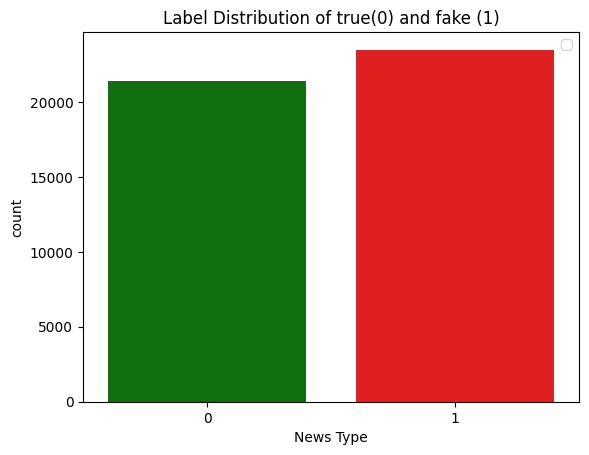

In [ ]:
sns.countplot(x='label' , data = data , palette = ['green','red'])
plt.title('Label Distribution of true(0) and fake (1)')
plt.legend()
plt.xlabel('News Type')

plt.show()

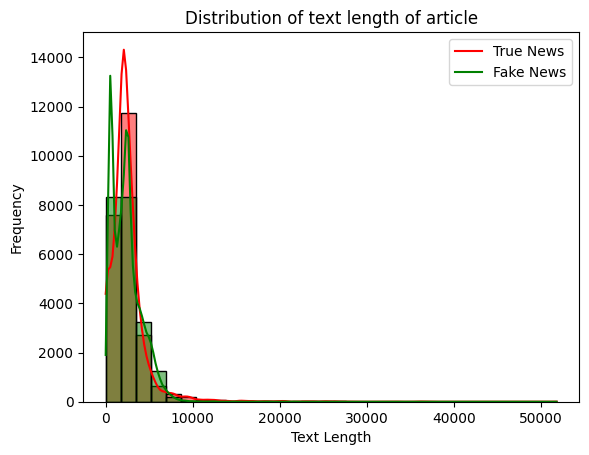

In [ ]:
sns.histplot(data =data , x="text_length" , hue="label",bins = 30 , kde = True ,palette = ['green','red'])
plt.title('Distribution of text length of article')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(labels = ['True News' ,'Fake News'])
plt.show()

In [ ]:
data['text_length'] = data['text'].apply(len)
display(data.head())

,title,text,subject,date,label,text_length
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,2893
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,1898
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,3597
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,2774
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,2346


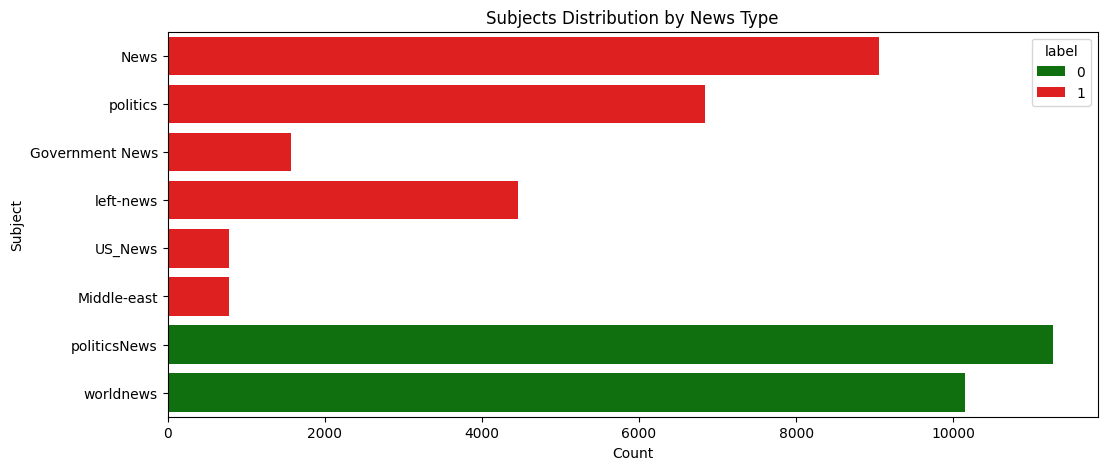

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(y="subject", data=data, hue="label", palette=["green", "red"])
plt.title("Subjects Distribution by News Type")
plt.xlabel("Count")
plt.ylabel("Subject")
plt.show()

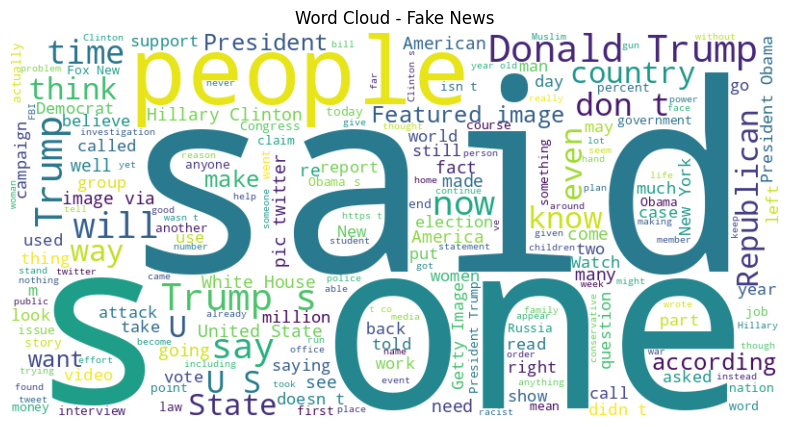

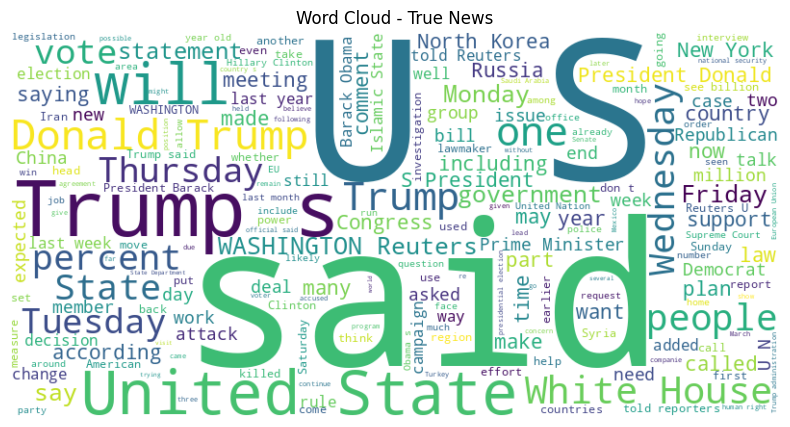

In [ ]:
from wordcloud import WordCloud

fake_text = " ".join(df_fake["text"])
true_text = " ".join(df_true["text"])

# Fake News Wordcloud
wc_fake = WordCloud(width=800, height=400, background_color="white").generate(fake_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Fake News")
plt.show()

# True News Wordcloud
wc_true = WordCloud(width=800, height=400, background_color="white").generate(true_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_true, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - True News")
plt.show()

/tmp/ipython-input-3200687094.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="text_length", data=data, palette=["green", "red"])


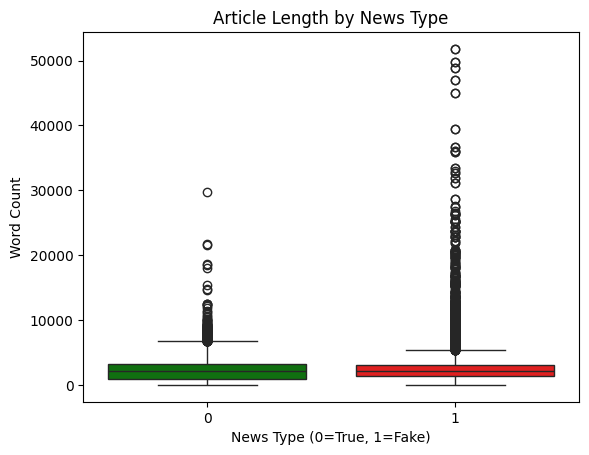

In [ ]:
sns.boxplot(x="label", y="text_length", data=data, palette=["green", "red"])
plt.title("Article Length by News Type")
plt.xlabel("News Type (0=True, 1=Fake)")
plt.ylabel("Word Count")
plt.show()

In [ ]:
# Logistic Regression for Fake News Detection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd



# Split data
X_train, X_test, y_train, y_test = train_test_split(
    data['text'], data['label'], test_size=0.2, random_state=42
)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression Model
model_lr = LogisticRegression()
model_lr.fit(X_train_vec, y_train)
y_pred_lr = model_lr.predict(X_test_vec)

# Evaluation
acc_log = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_log)
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9868596881959911
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4247
           1       0.99      0.99      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
# SVM Model for Fake News Detection
from sklearn.svm import LinearSVC

# Train SVM
model_svm = LinearSVC()
model_svm.fit(X_train_vec, y_train)
y_pred_svm = model_svm.predict(X_test_vec)

# Evaluation
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9947661469933184
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4247
           1       0.99      1.00      1.00      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
# LSTM for Fake News Detection
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Encode labels (if categorical)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=300)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=300)

# LSTM Model
model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=300),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_lstm.fit(X_train_seq, y_train_enc, epochs=5, batch_size=64, validation_split=0.2)

# Evaluation
loss, acc_lstm = model_lstm.evaluate(X_test_seq, y_test_enc)
print(f"LSTM Accuracy: {acc_lstm:.4f}")

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


449/449 ━━━━━━━━━━━━━━━━━━━━ 514s 1s/step - accuracy: 0.9296 - loss: 0.2112 - val_accuracy: 0.9839 - val_loss: 0.0558
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - accuracy: 0.9871 - loss: 0.0443 - val_accuracy: 0.9478 - val_loss: 0.1313
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 480s 1s/step - accuracy: 0.9795 - loss: 0.0618 - val_accuracy: 0.9872 - val_loss: 0.0488
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 479s 1s/step - accuracy: 0.9895 - loss: 0.0340 - val_accuracy: 0.9858 - val_loss: 0.0527
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 481s 1s/step - accuracy: 0.9856 - loss: 0.0440 - val_accuracy: 0.9641 - val_loss: 0.1044
281/281 ━━━━━━━━━━━━━━━━━━━━ 35s 126ms/step - accuracy: 0.9637 - loss: 0.1126
LSTM Accuracy: 0.9648


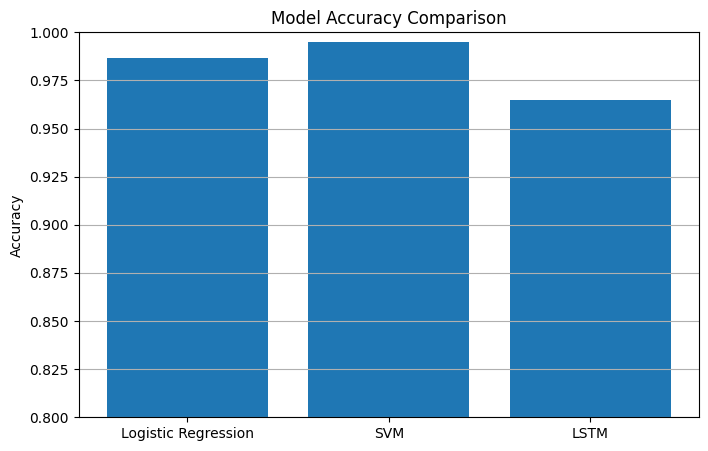

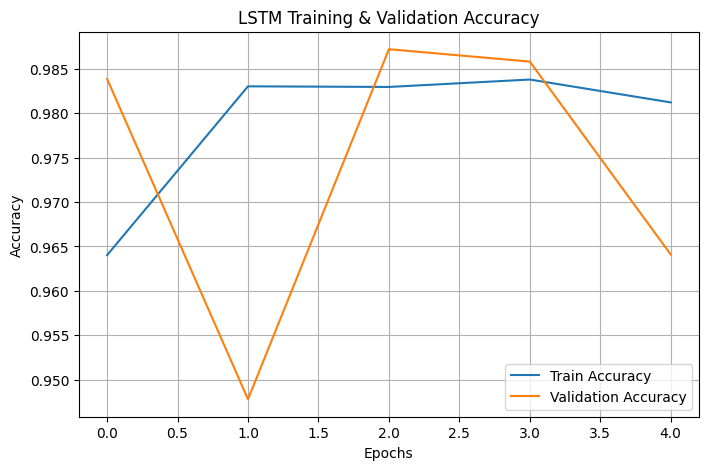

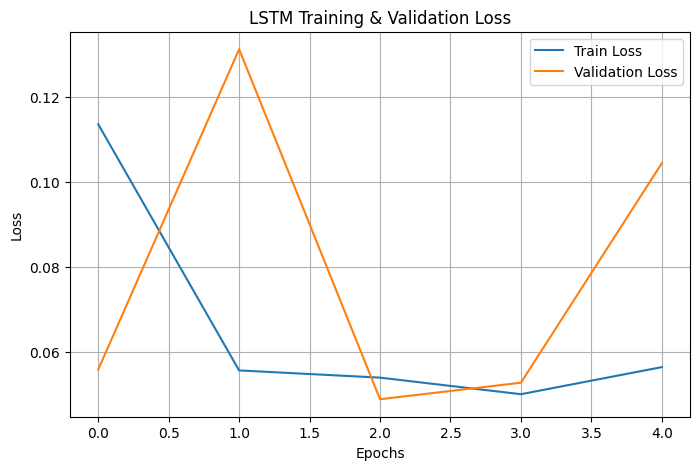

In [ ]:
models = ['Logistic Regression', 'SVM', 'LSTM']
accuracies = [acc_log, acc_svm, acc_lstm]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.grid(axis='y')
plt.show()

# === LSTM TRAINING CURVE ===
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("LSTM Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# === LSTM LOSS CURVE ===
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

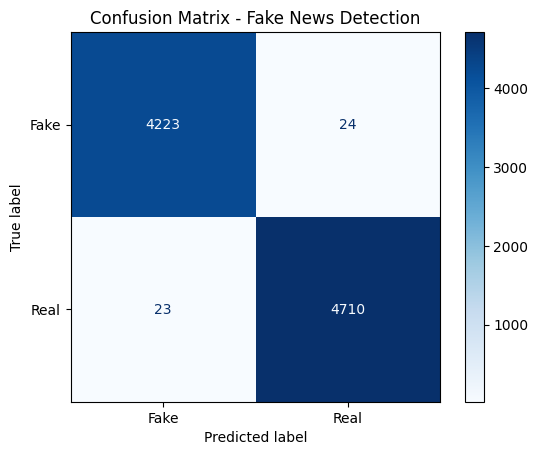

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_svm)  # You can use LSTM or any model
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Fake News Detection")
plt.show()


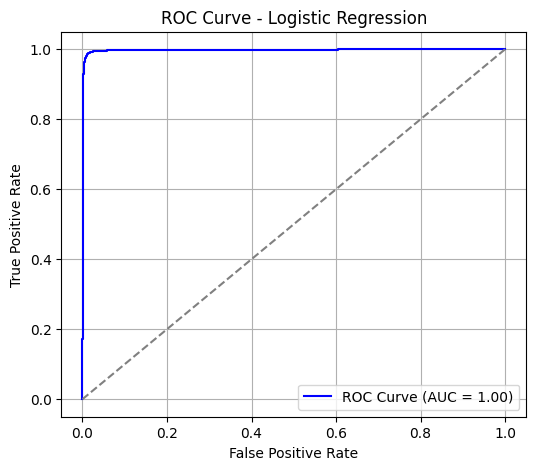

In [ ]:
from sklearn.metrics import roc_curve, auc
y_prob = model_lr.predict_proba(X_test_vec)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()